In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from data_craw import integration
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')


data_file_name='data.csv'

import os
if os.path.isfile(data_file_name):
    print('Load {} from cache'.format(data_file_name))
    df=pd.read_csv(data_file_name)
else:
    print('The cache is not established. Trying to create it from data_craw.py script')
    bl=integration()
    df=pd.DataFrame(bl)
    df.index=df['id']
    df.to_csv(data_file_name)


Load data.csv from cache


In [3]:
df

,id,content,des_len,diff,hit,id.1,solve,t_content
0,1,187,25,5,13792,1,537234,85
1,2,312,32,5,7571,2,438350,135
2,3,111,17,5,6364,3,317208,65
3,4,209,20,5,5414,4,285419,101
4,5,206,24,5,4627,5,297082,70
5,6,431,17,5,4524,6,298805,156
6,7,137,16,5,3756,7,256030,62
7,8,1255,30,5,4263,8,220371,1071
8,9,229,46,5,4090,9,220702,157
9,10,105,19,5,3710,10,202710,65


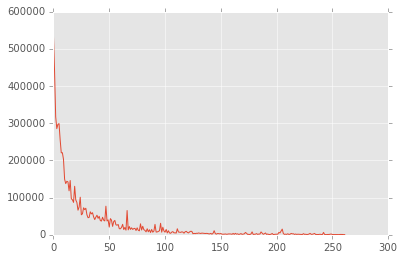

In [4]:
plt.plot(df['solve'])

对于这种形态，直接回归很容易造成序列自相关之类的问题。

In [6]:
res = smf.ols('solve~id',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solve   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     128.3
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           1.92e-24
Time:                        22:31:36   Log-Likelihood:                -3224.6
No. Observations:                 262   AIC:                             6453.
Df Residuals:                     260   BIC:                             6460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.405e+04   6663.893     14.113      0.000      8.09e+04  1.07e+05
id          -497.6201     43.928    -11.328      0.000      -584.121  -411.119
==============================================================================
Omnibus:                      269.986   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8113.088
Skew:                           4.287   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DW统计量0.079，显示极强的正自相关。画图看看残差图

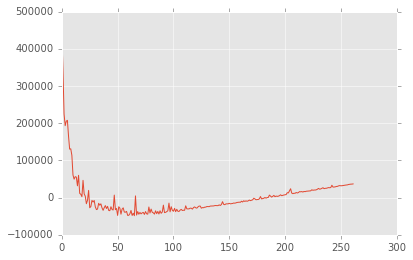

In [7]:
plt.plot(res.resid)

..简直了，Omnibus与JB统计量反映正态性检验，显然正态性也不怎么样

(array([ 160.,   88.,    4.,    3.,    2.,    3.,    0.,    0.,    1.,    1.]),
 array([ -48709.80833893,     529.36091687,   49768.53017267,
          99007.69942847,  148246.86868427,  197486.03794008,
         246725.20719588,  295964.37645168,  345203.54570748,
         394442.71496328,  443681.88421908]),
 <a list of 10 Patch objects>)

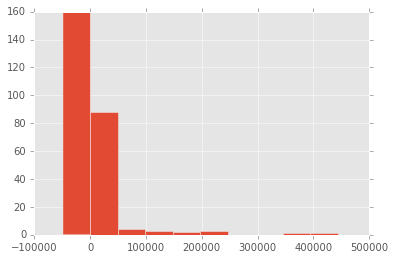

In [8]:
plt.hist(res.resid)

当然这也许对于我们的目的，根据假设识别出两种不同的用户是有用的。正是直接的方式的失败，才引出更复杂情况的可能。

我们先考虑只有一种用户的模型，在总随机模型中我们可以设到来的用户量是随机的（之后马上被条件化定为观测值，此后作为常数），
此外每个用户遵循以下随机过程来做题：

以一个固定的概率$p$做出与没做出一个题，一旦没做出就完全放弃。$p$与题目任何属性无关。

显然单个用户做出题数服从几何分布（几何分布是一旦成功就停止，输出为失败次数。我这是一旦“失败”就停止，实际是一样，定义1-p即可），
不过我们并不是考虑做出总题数的分布。而是那么多个用户的无限次实现中蕴含在各题上留下solve次数的样本函数。如第一张图所示。

我们来模拟一下

In [9]:
from scipy import stats

In [15]:
np.random.geometric?

(array([  1.39040000e+04,   4.20700000e+03,   1.31300000e+03,
          4.12000000e+02,   1.07000000e+02,   3.10000000e+01,
          1.70000000e+01,   6.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   23.9,   46.8,   69.7,   92.6,  115.5,  138.4,  161.3,
         184.2,  207.1,  230. ]),
 <a list of 10 Patch objects>)

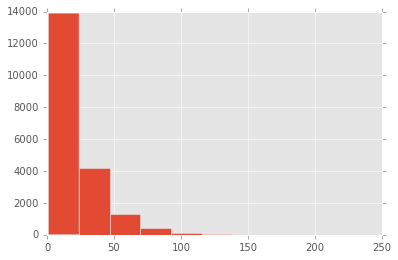

In [23]:
plt.hist(np.random.geometric(0.05,20000))

这种定义的一个致命问题是它实际不可能产生出观测值中出现的后面的solve值比前面的大的情况。
这与我们见到的那种别的不行，但一定可以表示所有“合理”观测值的的模型（比如线性回归）完全不同。

我们有两种基本思路可以解决这个问题，一个是假设我们看到的solve数有误差来回避这个问题（虽然我们知道其实没有误差，
但也可以看成某种模型外的元素，它们全部合并为“误差”来考虑了）。加上了误差，所有蹩脚模型都可以表示所有数据了。

另一个是增加一种行为，比如以$q$的概率在做不出时跳到下一题而不是完全放弃。这样也可以表示所有数据。

虽然模型1是一种显然的蹩脚模型，但我们还是试图估计它作为一种基线。于是我们设定

$$
X_i \sim A \quad i = 1,...,n \quad i.i.d \\
solve = \sum_i^n X_i + \epsilon \\
\epsilon \sim B 
$$

其中$X_i$是取值$0,1$的$p$维向量，$p$是考虑问题的个数。$X_{ij}=1$表示$n$个个体中的第$i$个做出了第$j$个问题。取$0$则表示没做出来。

分布$A$是某种观测是$X_i$那种向量的分布，我们可以用上面提到的几何分布来生成。$B$则是某种观测是类似$X_i$形式，
但是取值是整个整数集而不止$0,1$的分布。

如果我们进一步指定$A$就是那种几何分布生成的分布，则它有一个参数（如果$p$不固定的话，有两个）。再钦定$B$是某种对称的取整数的分布，
比如trim正态(1.5得1,-1.5得-1那种)，我们实际就可以利用OLS估计了。我们假设有一个估计量$f(X,solve)$，每次抽样中，
他拿估计出的参数与真实参数比对，我们可以要求它们的“距离”的期望最小化来限制出估计量。然后作用该估计量到实际观测值上得到实际估计值。

这个OLS并没有看上去那么简单，因为从频率主义看，估计量的随机性质是给定参数后才决定的（虽然也许可以通过巧妙地设定让其与特定参数取值无关），
那么在给定参数下的最优“估计量”当然是完全不管样本直接返回那些给定参数值的常函数。我们之所以不选择它们，
是因为很容易在其他地位平等的参数中选择一个，让这个“估计量”的损失期望从0变成不知道高到哪里去。

线性回归的OLS的损失由元假设加到$Y$而不是参数上，这使得常函数不再有用，如果我们借用这个思路的话，
我们可以把损失直接变为solve的实现值与估计出参数确定的期望值的差（在p各solve值上）的平方和。并令其期望最小化约束出最优估计量。
这种搞法仍然没有被证明是可以是脱离特定取值的最优取法。多元回归，在它严苛的元假设下，
是否证明了它在所有可能的$\beta,\Sigma$设定下的那个正规方程的估计可以达到残差平方和期望的最小化？似乎是的，
因为它本来就是从任意样本上的残差平方和最小化推导出来的（令人吃惊的是，其在线性函数族中的最优性同时使得它有着可以被简单的线性函数所表达的性质。）

所以如果我们那样定义solve的损失的话，我们只需要在某个函数族里找到使得总可以使样本损失最小的那个估计量即可（它在所有模型参数设定和所有模型设定产生的样本上均取最小值）。这时我们耍一下赖皮，
我们直接用某个函数族上的数值优化程序来选择其中的最优函数。即每给定一个样本，我们就直接跑可以使这个样本损失最小的参数优化程序，显然这个“估计量”符合我们前面所述的最优性质，它在所有参数设定产生的所有样本上产生了最小的样本损失，从而它的期望也是最小的。

这个赖皮方法阻碍了我们对此估计量进行理论分析，我们甚至难以讨论它的无偏性。但是，无论如何，它是可以计算的。

现在离实现估计只差到底怎么优化这一个问题了，我们要求的是估计量估计的参数决定的solve的期望（类似多元回归的“预测值，预测期望”）与观测值之差的平方和的期望的最小化。我们只需要知道参数到底怎么决定solve的期望，然后取能使样本损失最小的那个参数即可。（有点某些问题里突然莫名其妙就搞自身变换解决的味道，我们这里的魔弹是数值计算方法）。

对于第一个模型来说，我们只需要成功率$p$与$n$怎么决定solve随机序列的期望序列即可。这其实很简单，只需要考虑单个人的期望序列再叠加即可。
因为终结在哪服从几何分布，所以期望其实就是几何分布的ccdf(即1-cdf)，即做出某题的期望等于在后面的题终结的概率。

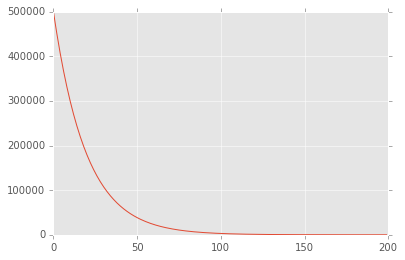

In [32]:
plt.plot(500000*(1-stats.geom(0.05).cdf(np.arange(0,200))))

然后对$p$进行连续优化即可。